In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm

%matplotlib inline

import torch
import torchvision

import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random

from torch.utils.data import Dataset, DataLoader

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


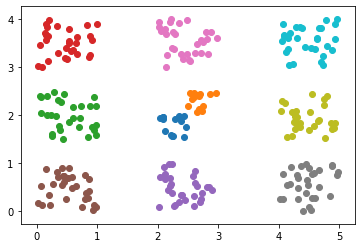

In [159]:
true_data = 30
true_class_size = int(true_data/2)
corruption_size = 240
corrupted_class_size = int(corruption_size/8)
x11 = np.random.uniform(low=[2,1.5], high = [2.5,2],size =(true_class_size,2) )
x12 = np.random.uniform(low=[2.5,2], high = [3,2.5],size =(true_class_size,2) )


x2 = np.random.uniform(low = [0,1.5] , high = [1,2.5],size=(corrupted_class_size,2))
x3 = np.random.uniform(low = [0,3] , high = [1,4],size=(corrupted_class_size,2))

x4 = np.random.uniform(low = [2,0] , high = [3,1],size=(corrupted_class_size,2))

x5 = np.random.uniform(low = [0,0] , high = [1,1],size=(corrupted_class_size,2))

x6 = np.random.uniform(low = [2,3] , high = [3,4],size=(corrupted_class_size,2))

x7 = np.random.uniform(low = [4,0] , high = [5,1],size=(corrupted_class_size,2))

x8 = np.random.uniform(low = [4,1.5] , high = [5,2.5],size=(corrupted_class_size,2))

x9 = np.random.uniform(low = [4,3] , high = [5,4],size=(corrupted_class_size,2))
plt.scatter(x11[:,0],x11[:,1])
plt.scatter(x12[:,0],x12[:,1])
plt.scatter(x2[:,0],x2[:,1])
plt.scatter(x3[:,0],x3[:,1])

plt.scatter(x4[:,0],x4[:,1])
plt.scatter(x5[:,0],x5[:,1])
plt.scatter(x6[:,0],x6[:,1])


plt.scatter(x7[:,0],x7[:,1])
plt.scatter(x8[:,0],x8[:,1])
plt.scatter(x9[:,0],x9[:,1])



In [0]:
y11  = np.zeros(true_class_size)
y12 = np.ones(true_class_size)

Y2_ = []
for i in range(8):
    idx = np.random.randint(0,corrupted_class_size, size = int(corrupted_class_size/2))
    y2 = np.ones(corrupted_class_size)
    y2[idx] = 0 
    Y2_.append(y2)

Y2_ = np.concatenate(Y2_,axis=0)
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [0]:
X_train = np.concatenate((x11,x12,x2,x3,x4,x5,x6,x7,x8,x9))

Y_train = np.concatenate((y11,y12,Y2_))



In [162]:
X_train.shape,Y_train.shape

((270, 2), (270,))

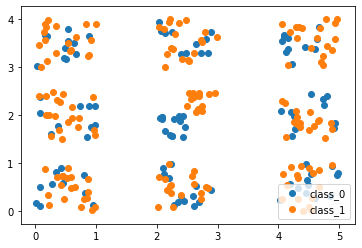

In [163]:
plt.scatter(X_train[Y_train==0,0],X_train[Y_train==0,1],label = "class_0")
plt.scatter(X_train[Y_train==1,0],X_train[Y_train==1,1],label = "class_1")
plt.legend()


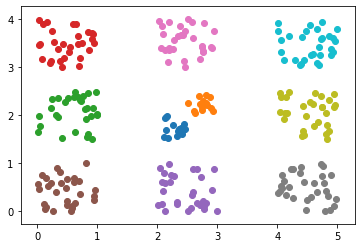

In [164]:
x11 = np.random.uniform(low=[2,1.5], high = [2.5,2],size =(true_class_size,2) )
x12 = np.random.uniform(low=[2.5,2], high = [3,2.5],size =(true_class_size,2) )


x2 = np.random.uniform(low = [0,1.5] , high = [1,2.5],size=(corrupted_class_size,2))
x3 = np.random.uniform(low = [0,3] , high = [1,4],size=(corrupted_class_size,2))

x4 = np.random.uniform(low = [2,0] , high = [3,1],size=(corrupted_class_size,2))

x5 = np.random.uniform(low = [0,0] , high = [1,1],size=(corrupted_class_size,2))

x6 = np.random.uniform(low = [2,3] , high = [3,4],size=(corrupted_class_size,2))

x7 = np.random.uniform(low = [4,0] , high = [5,1],size=(corrupted_class_size,2))

x8 = np.random.uniform(low = [4,1.5] , high = [5,2.5],size=(corrupted_class_size,2))

x9 = np.random.uniform(low = [4,3] , high = [5,4],size=(corrupted_class_size,2))
plt.scatter(x11[:,0],x11[:,1])
plt.scatter(x12[:,0],x12[:,1])
plt.scatter(x2[:,0],x2[:,1])
plt.scatter(x3[:,0],x3[:,1])

plt.scatter(x4[:,0],x4[:,1])
plt.scatter(x5[:,0],x5[:,1])
plt.scatter(x6[:,0],x6[:,1])


plt.scatter(x7[:,0],x7[:,1])
plt.scatter(x8[:,0],x8[:,1])
plt.scatter(x9[:,0],x9[:,1])

yt11  = np.zeros(true_class_size)
yt12 = np.ones(true_class_size)

Yt2_ = []
for i in range(8):
    idx = np.random.randint(0,corrupted_class_size, size = int(corrupted_class_size/2))
    yt2 = np.ones(corrupted_class_size)
    yt2[idx] = 0 
    Yt2_.append(y2)

Yt2_ = np.concatenate(Yt2_,axis=0)
Y_test = np.concatenate((yt11,yt12,Yt2_))
X_test = np.concatenate((x11,x12,x2,x3,x4,x5,x6,x7,x8,x9))

In [165]:
X_test.shape , Y_test.shape

((270, 2), (270,))

In [0]:
class Grid_data(Dataset):
    def __init__(self,x,y):
        self.x = torch.Tensor(x)
        self.y = torch.Tensor(y).type(torch.LongTensor)
    
    def __len__(self):
        
        return len(self.x)
    
    
    def __getitem__(self,idx):
        self.dx = self.x[idx,:]
        self.dy = self.y[idx]
        
        self.dx = self.dx
        self.dy = self.dy
        return self.dx, self.dy
        

In [0]:
trainset = Grid_data(X_train,Y_train)


In [0]:
trainloader = DataLoader(trainset,batch_size=30,shuffle = False)

In [0]:
inputs,label = iter(trainloader).next()

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.linear1 = nn.Linear(2,24)
        self.linear2 = nn.Linear(24,64)
        self.linear3 = nn.Linear(64,128)
        self.linear4 = nn.Linear(128,256)
        self.linear5 = nn.Linear(256,128)
        self.linear6 = nn.Linear(128,64)
        self.linear7 = nn.Linear(64,32)
        self.linear8 = nn.Linear(32,16)
        self.linear9 = nn.Linear(16,2)
        
    def forward(self,x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        x = F.relu(self.linear5(x))
        x = F.relu(self.linear6(x))
        x = F.relu(self.linear7(x))
        x = F.relu(self.linear8(x))
        x = self.linear9(x)
        
        
        return x

In [0]:
net = Net()
# net(inputs)


In [0]:
net = net.to("cuda")

In [0]:
criterion = nn.CrossEntropyLoss()
lr=0.001
optimizer = optim.Adam(net.parameters(), lr)#, momentum=0.9)

In [174]:
loss_curi = []
epochs_nos= 10000
for epoch in range(epochs_nos): # loop over the dataset multiple times
    ep_lossi = []
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to("cuda"),labels.to("cuda")

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        mini = 3
        if i % mini == mini-1:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss/mini ))
            ep_lossi.append(running_loss/mini) # loss per minibatch
            running_loss = 0.0
    if(np.mean(ep_lossi)<= 0.05):
      epochs_nos = epoch
      break        
    loss_curi.append(np.mean(ep_lossi))   #loss per epoch
#     if (epoch%5 == 0):
#         _,actis= inc(inputs)
#         acti.append(actis)
    
            

print('Finished Training')

Streaming output truncated to the last 5000 lines.
[3306,     3] loss: 0.065
[3306,     6] loss: 0.124
[3306,     9] loss: 0.275
[3307,     3] loss: 0.032
[3307,     6] loss: 0.113
[3307,     9] loss: 0.253
[3308,     3] loss: 0.030
[3308,     6] loss: 0.084
[3308,     9] loss: 0.235
[3309,     3] loss: 0.028
[3309,     6] loss: 0.066
[3309,     9] loss: 0.231
[3310,     3] loss: 0.024
[3310,     6] loss: 0.063
[3310,     9] loss: 0.232
[3311,     3] loss: 0.025
[3311,     6] loss: 0.054
[3311,     9] loss: 0.244
[3312,     3] loss: 0.044
[3312,     6] loss: 0.068
[3312,     9] loss: 0.319
[3313,     3] loss: 0.109
[3313,     6] loss: 0.100
[3313,     9] loss: 0.321
[3314,     3] loss: 0.040
[3314,     6] loss: 0.251
[3314,     9] loss: 0.624
[3315,     3] loss: 0.028
[3315,     6] loss: 0.107
[3315,     9] loss: 0.400
[3316,     3] loss: 0.047
[3316,     6] loss: 0.117
[3316,     9] loss: 0.365
[3317,     3] loss: 0.152
[3317,     6] loss: 0.109
[3317,     9] loss: 0.281
[3318,     3]

In [175]:
correct = 0
total = 0
out = []
pred = []
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to("cuda"), labels.to("cuda")
        out.append(labels.cpu().numpy())
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        pred.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d train images: %d %%' % (true_data+corruption_size, 100 * correct / total))
train_acc = 100 * correct / total

Accuracy of the network on the 270 train images: 99 %


In [176]:
total,correct

(270, 268)

In [0]:
out = np.concatenate(out,axis=0)
pred = np.concatenate(pred,axis=0)

In [178]:
out[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [179]:
pred[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
X_axis,Y_axis = np.meshgrid(np.arange(0,5,0.01),np.arange(0,5,0.01))
X_mesh = np.concatenate( (X_axis.reshape((-1,1)), Y_axis.reshape(-1,1)), axis=1 )
Y_mesh = np.zeros(X_mesh.shape[0])

In [0]:
mesh_set = Grid_data(X_mesh,Y_mesh)
meshloader = DataLoader(mesh_set,batch_size=1000,shuffle=False)

In [182]:
total = 0
mesh_pred = []
with torch.no_grad():
    for data in meshloader:
        images, _ = data
        images = images.to("cuda")
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        mesh_pred.append(predicted.cpu().numpy())
        total += labels.size(0)
print("finished")

finished


In [0]:
mesh_pred = np.concatenate(mesh_pred,axis=0)
# mesh_pred = mesh_pred.reshape(X.shape)

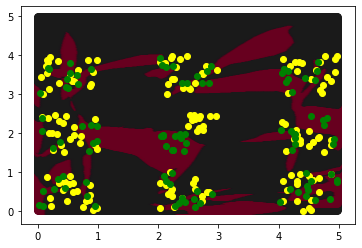

In [184]:
# plt.axis('equal')
plt.scatter(X_mesh[:,0],X_mesh[:,1],c= mesh_pred, cmap = 'RdGy' )
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1] ,c="Yellow")
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1],c= "green" )

In [185]:
X_test.shape, Y_test.shape

((270, 2), (270,))

In [0]:
testset = Grid_data(X_test,Y_test)
testloader = DataLoader(testset,batch_size=10,shuffle=False)

In [187]:
correct = 0
total = 0
out = []
pred = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to("cuda"), labels.to("cuda")
        out.append(labels.cpu().numpy())
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        pred.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d test images: %d %%' % (true_data+corruption_size,    100 * correct / total))

Accuracy of the network on the 270 test images: 61 %


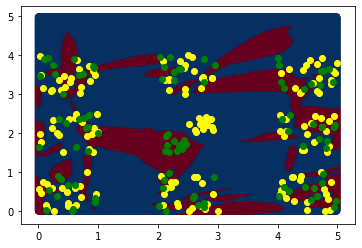

In [188]:
plt.scatter(X_mesh[:,0],X_mesh[:,1],c= mesh_pred, cmap = "RdBu")
plt.scatter(X_test[Y_test==1,0], X_test[Y_test==1,1] ,c="Yellow")
plt.scatter(X_test[Y_test==0,0], X_test[Y_test==0,1],c= "green" )

In [0]:
torch.save(net.state_dict(),"/content/drive/My Drive/Research/confounded_noise/weights_linear_seperable_at_center/model_"+str(epochs_nos)+"_lr_"+str(lr)+"_acc_"+str(train_acc)+"_true_"+str(true_data)+".pkl")